# Libs and loading moon img

In [ ]:
from matplotlib.pyplot import plot,imshow,figure,subplot,cm
from skimage import io,transform,exposure,feature,morphology,filters
from skimage.filters import threshold_otsu
import numpy as np
from skimage.morphology import selem
from skimage.filters import edges
from skimage.draw import circle
from skimage.color import gray2rgb
import time
img_big = io.imread("./drive/MyDrive/mesiac.tif")
position_x = 8000
position_y = 15500
cut_img = img_big[position_x:9500,position_y:17000]

In [ ]:
#TODO: recalculate position to big MOON picture

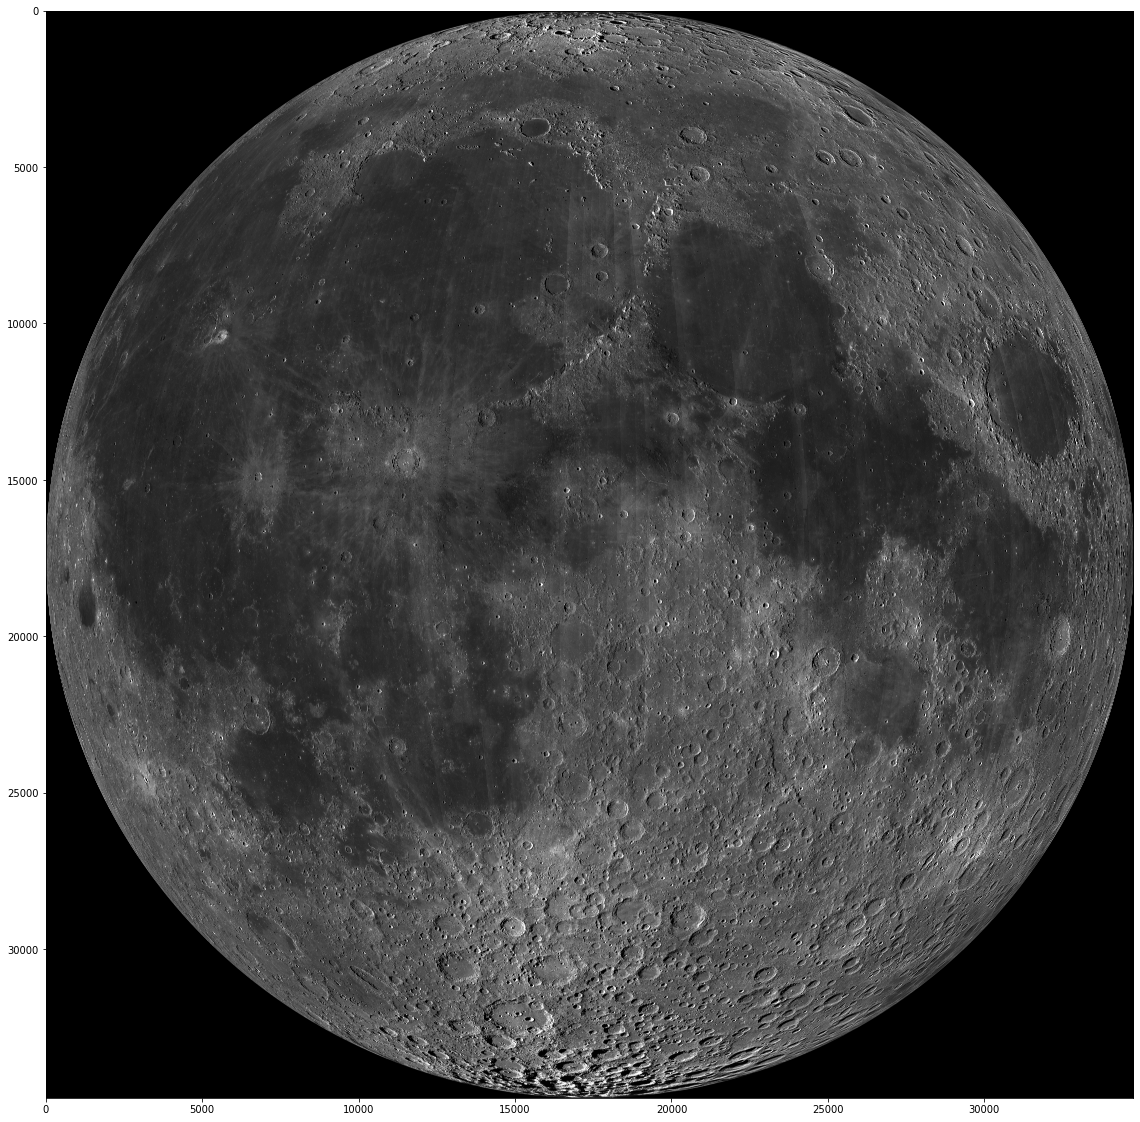

In [ ]:
figure(figsize=(20,20))
imshow(img_big,cmap="gray")

# Testing one By one

Calculating Hough Transformation
Looking for big crater...
Processing peaks...
Got: 1167 peaks
Removing dulicates..
FIND one! with radius:410


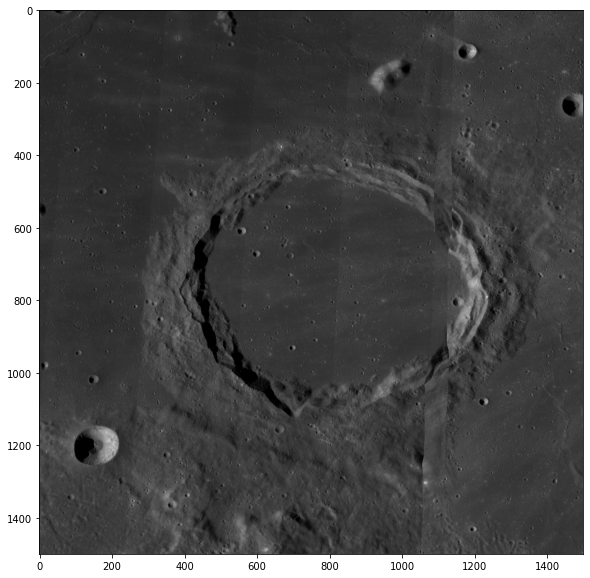

In [ ]:
mask = processCutImage(cut_img)
figure(figsize=(20,10))
imshow(cut_img,cmap = "gray")
res = getBigCrater(mask,cut_img,np.arange(400, 500, 10))
BC_img,BC_img_pos,BC_circle,mask = res


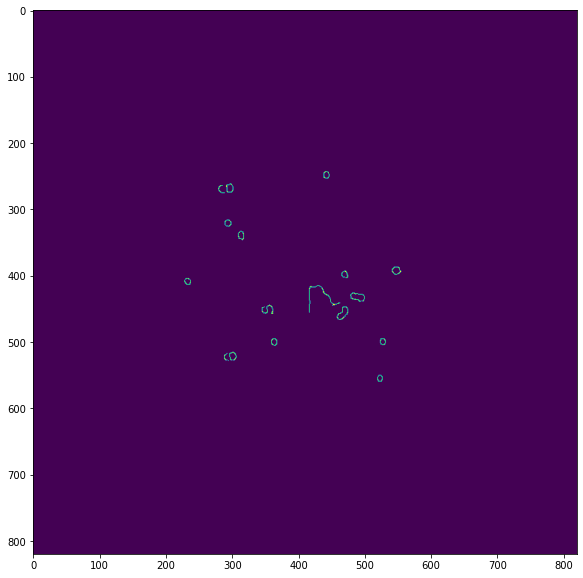

In [ ]:
BC_img_proccesed= processBigCrater(BC_img,mask)
figure(figsize=(20,10))
imshow(BC_img_proccesed)

Looking for small craters...
Processing peaks...
Got: 1501 peaks
Removing dulicates..
5


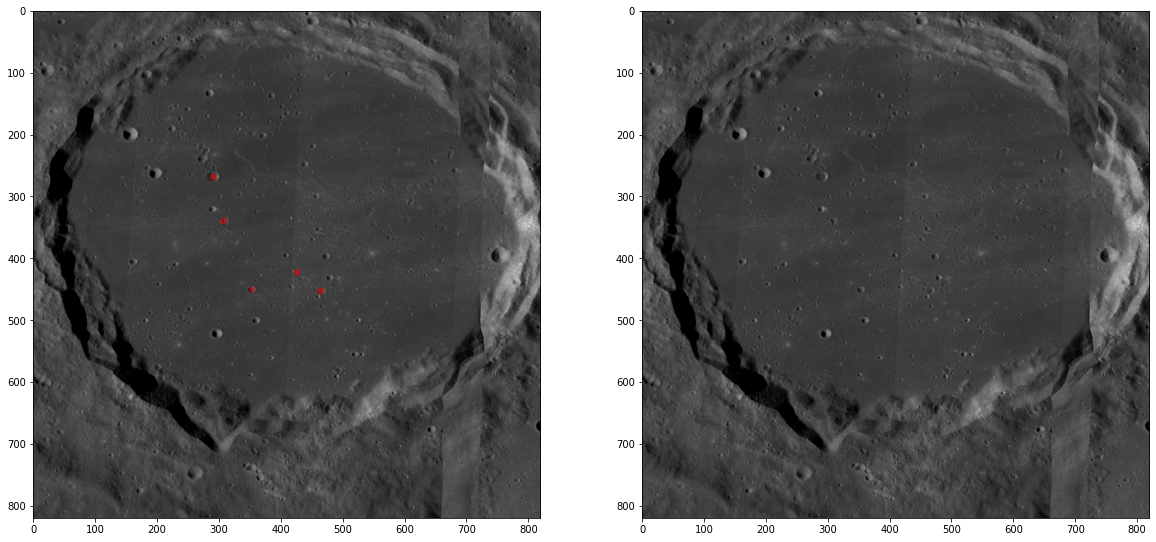

In [ ]:
hough_res = gen_houghSpace_circle(BC_img_proccesed,np.arange(8, 12, 2))
print("Looking for small craters...")
SM_circles = findPeaks(hough_res,np.arange(5, 12, 1),num_peaks=5,threshold=0.3,min_pixel_distance=30)
Craters_RGBA_mask = prepareRGBA_mask(BC_img)

    
for center_y, center_x, radius in zip(SM_circles[0],SM_circles[1],SM_circles[2]): 
    circy, circx = circle(center_y, center_x, radius,shape=BC_img.shape)
    Craters_RGBA_mask[circy,circx] = (1,0,0,0.5)
print(SM_circles[0].size)
figure(figsize=(20,10))
subplot(121)
imshow(BC_img,cmap="gray")
imshow(Craters_RGBA_mask,cmap="gray")

subplot(122)
imshow(BC_img,cmap="gray")

# Testing algorithm

Calculating Hough Transformation
Looking for big crater...
Processing peaks...
Got: 2172 peaks
Removing dulicates..
FIND one! with radius:390
Looking for small craters...
Processing peaks...
Got: 134 peaks
Removing dulicates..
[345 418 283 481 299]
Got:5 small craters
[800]
[791 864 729 927 745]


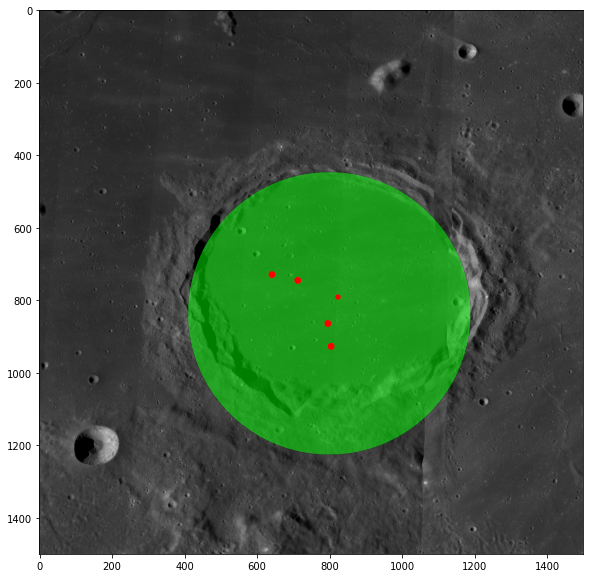

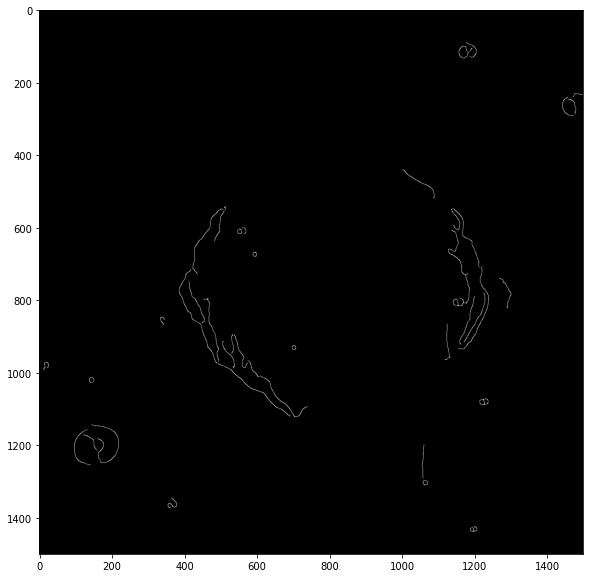

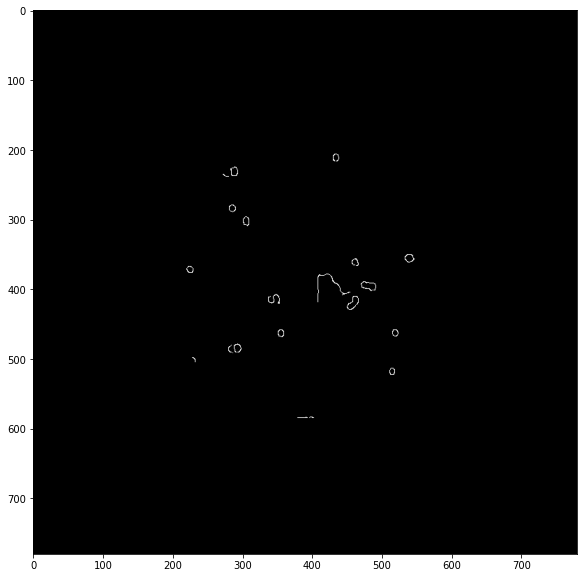

In [ ]:
Craters = []
mask = processCutImage(cut_img)
res = algorithm(mask,cut_img)
if res != None:
    BC_circle,SM_circles = res
    BC_circle = smallInBigPosition((position_x,position_y),BC_circle)   # prevod na velky obrázok moonu
    SM_circles = smallInBigPosition((position_x,position_y),SM_circles)   # prevod na velky obrázok moonu
    Craters.append((BC_circle,SM_circles))

In [ ]:
picGen = cutBig_image(img_big,1050,1300)
Craters = []
for obrazok,pos in picGen
    maska = processCutImage(obrazok)
    imshow(obrazok)
    res = algorithm(maska,obrazok)
    if res != None:
        BC_circle,SM_circles = res
        BC_circle = smallInBigPosition(pos,BC_circle)   # prevod na velky obrázok moonu
        SM_circles = smallInBigPosition(pos,SM_circles)   # prevod na velky obrázok moonu
        Craters.append((BC_circle,SM_circles))

In [ ]:
algorithm(maska,obrazok)

Calculating Hough Transformation
Looking for big crater...
Processing peaks...
Got: 8962 peaks
Removing dulicates..
FIND one! with radius:450
But image is black :/


In [ ]:
picGen = picGen = cutBig_image(img_big,1050,1300)
picGen = itertools.islice(picGen,159,160,1)

In [ ]:
import math
def cutBig_image(img_big,cut_h,cut_w):
    x,y = 0,0

    h,w = img_big.shape
    stopIterate = math.ceil(h/cut_h)*math.ceil(w/cut_w)
    iterationNum = 0
    while(1):
        
        iterationNum = iterationNum +1
        if iterationNum > stopIterate:
            break;
        elif x>w:
            x-=cut_w #vrat sa s5
            cutImg = img_big[y:(y+cut_h),x:-1]
            y+=cut_h
            x = 0
        elif x>w and y>h:
             y-=cut_h
             x-=cut_w
             cutImg = img_big[y:-1,x:-1]
        elif y>h:
             y-=cut_h
             cutImg = img_big[y:-1,x:(x+cut_w)]
        else:
            cutImg = img_big[y:(y+cut_h),x:(x+cut_w)]
        x += cut_w

        if (cutImg[0,0]+cutImg[-1,0]+cutImg[0,-1]+cutImg[-1,-1])!= 0:
            print("Iteration num: {}/{}".format(iterationNum,stopIterate))
            yield cutImg,(y,x)
        else:
            print("Skipping Black Picture,Iteration num: {}/{}".format(iterationNum,stopIterate))

# Algorithm

In [ ]:
def algorithm(img_mask,or_img):
    
    res = getBigCrater(img_mask,or_img,np.arange(350, 500, 10))
    if res == None:
        return None
    else :
        BC_img,BC_img_pos,BC_circle,mask = res
        BC_img = processBigCrater(BC_img,mask)
        SM_circles = findSmallCraters_inBIG_CRATER(BC_img,np.arange(8, 12, 2),(BC_img_pos[0],BC_img_pos[1]))
        if SM_circles[0].size == 5:
            plotCrater(or_img,BC_circle,SM_circles,img_mask,BC_img)
            return (BC_circle,SM_circles)
        else:
            return None
    
   


## Processing images and help functions

In [ ]:
def processBigCrater(BC_img,mask):

    #old
    BC_img_new = feature.canny(BC_img, sigma=4, low_threshold=1, high_threshold=10)
    #BC_img_new = morphology.opening(BC_img_new)
    BC_img_new[mask] = 0

    return BC_img_new

def processCutImage(cut_img):
    cut_img = feature.canny(cut_img, sigma=4, low_threshold=15, high_threshold=50)
    return cut_img

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    
    if iteration == total: 
        print()
def plotCrater(img,BC_circle,SM_circles,img_mask,BC_img):
    Craters_RGBA_mask = prepareRGBA_mask(img)

    circy_BIG, circxBIG = circle(BC_circle[1][0], BC_circle[0][0], BC_circle[2][0],shape=img.shape)

    Craters_RGBA_mask[circy_BIG,circxBIG] = (0,1,0,0.5)
    
    for center_y, center_x, radius in zip(SM_circles[0],SM_circles[1],SM_circles[2]): 
        circy, circx = circle(center_y, center_x, radius,shape=img.shape)
        Craters_RGBA_mask[circy,circx] = (1,0,0,1)

    figure(figsize=(20,10))
    imshow(img,cmap="gray")
    imshow(Craters_RGBA_mask,cmap="gray")
    figure(figsize=(20,10))
    imshow(img_mask,cmap="gray")
    figure(figsize=(20,10))
    imshow(BC_img,cmap= "gray")

def prepareRGBA_mask(image):
    img1 = np.zeros(image.shape)
    img1 = gray2rgb(img1)
    img1 = np.concatenate((img1, np.zeros((img1.shape[0], img1.shape[1], 1))), axis=2)
    return img1

## SmallCrater

In [ ]:
def findSmallCraters_inBIG_CRATER(image,hough_radii,ImgPos):
    hough_res = gen_houghSpace_circle(image,hough_radii)
    print("Looking for small craters...")
    cx, cy, radii = findPeaks(hough_res,hough_radii,num_peaks=5,threshold=0.5,min_pixel_distance=60)
    cx, cy,radii = smallInBigPosition(ImgPos,(cy,cx,radii))
    print("Got:{} small craters".format(len(cx)))
    return cy, cx, radii

def smallInBigPosition(smallImgPos,prev_circles):
    y_s,x_s = smallImgPos
    (y_prev,x_prev,r) = prev_circles
    print(y_prev)
    for i in range(0, y_prev.size):
        y_prev[i] = y_prev[i] + y_s
        x_prev[i] = x_prev[i] + x_s
    return x_prev,y_prev,r

## getBigCrater

In [ ]:
def getBigCrater(masked_img,from_img,hough_radii):
    print("Calculating Hough Transformation")

    hough_res = gen_houghSpace_circle(masked_img,hough_radii)
    # Select the most prominent 3 circles
    print("Looking for big crater...")
    cx, cy, radii = findPeaks(hough_res,hough_radii)


    if (len(cx) == 0):
        print("There is not Big crater")
        return None    
    x = cx[0]
    y = cy[0]
    w = radii[0]
    radius = w
    print("FIND one! with radius:{}".format(radius))
    x_slice = slice(x-w,x+w)
    y_slice = slice(y-w,y+w)
    new_img = np.zeros((w*2,w*2))
    
    new_img = np.copy(from_img[y_slice,x_slice])
    if (np.sum(new_img) == 0):
        print("But image is black :/")
        return None 
    mask = np.ones(new_img.shape,np.bool)

    radius = radius*0.50
    circy_n, circx_n = circle(w, w, radius,shape=new_img.shape)
    mask[circy_n,circx_n] = 0
    #new_img[mask] = 0 
    cir = (cx, cy, radii)
    ImPos = (y-w,x-w)

    return (new_img,ImPos,cir,mask)


# Hough Elipse transform

Rovnica kružnice:


> $\left(x\:-x_0\right)^2\:+\left(y-y_0\right)^2=r^2$

Z rovnice vyplíva, že hľadáme 3 parametre **x**, **y**(stred kružnice) a **r**(polomer).

## hough circle transform  in Python

In [ ]:
from skimage.draw import circle_perimeter
import numpy as np

def gen_houghSpace_circle_python(img,radius,printSteps=False):
    xmax = img.shape[0]
    ymax = img.shape[1] 

    x, y = np.nonzero(img) 
    num_pixels = x.size

    acc = np.zeros((len(radius),img.shape[0], img.shape[1]), dtype=np.double)
    IterationCounter = 0

    for i, rad in enumerate(radius): #1. prechádzam cez zvoloné hodnoty polomeru križníc napr. np.arrange(1,5,1) ==> 1,2,3,4
        IterationCounter+=1

        print("Step: {}/{}".format(IterationCounter,len(radius)))
        circle_x, circle_y = circle_perimeter(0, 0, rad) #2. načítam si pozície kruhu na pozícií 0,0 s daným r

        num_circle_pixels = circle_x.size # 3. načítam si počet pixelov na x_sovej suradnici daného kruhu, aby som vedel cez neho iterovať

        for p in range(num_pixels): # 4. Iterujem cez nenulovné pixeli obrázka

            if printSteps: 
                print("Step: {}/{}".format(p,num_pixels))
            for c in range(num_circle_pixels): #5. prechádzam cez všetky pozície kruhu s daným polomerom
                tx = x[p] + circle_x[c]  # vezmem nenulový pixel p_x z obrázka a "vlozím kružnicu do daného pixelu" a vypocítam stred_x tejto kružnice 
                ty = y[p] + circle_y[c]  # vezmem nenulový pixel p_y z obrázka a "vlozím kružnicu do daného pixelu" a vypocítam stred_x tejto kružnice
                if 0 <= tx < xmax and 0 <= ty < ymax: # ak sa pozícia stredu kružnice nachádza v obrázku, tak za danu pozíciu y,x,r  zahlasujem.  
                    acc[i, tx, ty] += 1
    return acc

## Testing hough Transform

Step: 1/5
Step: 2/5
Step: 3/5
Step: 4/5
Step: 5/5
Processing peaks...
Got: 1 peaks
Removing dulicates..
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
Here is circle (array([30]), array([30]), array([7]))


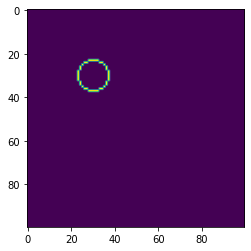

In [ ]:
obr = np.zeros((100,100))
x,y=circle_perimeter(30,30,7)
obr[x,y] = 1
imshow(obr)
rad_range = np.arange(5,10,1)
acc = gen_houghSpace_circle_python(obr,rad_range)
(cx,cy,radius) = findPeaks(acc,rad_range)
print("Here is circle {}".format((cx,cy,radius)))

## hough circle transform  in Cython

In [ ]:
%%writefile myLib.pyx
from skimage.draw import circle_perimeter
import numpy as np
cimport numpy as cnp

def gen_houghSpace_circle(cnp.ndarray img, cnp.ndarray[ndim=1, dtype=cnp.intp_t] radius):
    
    xmax = img.shape[0]
    ymax = img.shape[1]

    cdef cnp.ndarray[ndim=1, dtype=cnp.intp_t] x, y
    x, y = np.nonzero(img)
    cdef Py_ssize_t num_pixels = x.size


    cdef Py_ssize_t i, p, c, num_circle_pixels, tx, ty
    cdef double incr
    cdef cnp.ndarray[ndim=1, dtype=cnp.intp_t] circle_x, circle_y


    cdef cnp.ndarray[ndim=3, dtype=cnp.double_t] acc = \
         np.zeros((radius.size,
                   img.shape[0], 
                   img.shape[1]), dtype=np.double)
         
    for i, rad in enumerate(radius):
        circle_x, circle_y = circle_perimeter(0, 0, rad)
        num_circle_pixels = circle_x.size
        for p in range(num_pixels):
            for c in range(num_circle_pixels):
                tx = circle_x[c] + x[p]
                ty = circle_y[c] + y[p]
                if 0 <= tx < xmax and 0 <= ty < ymax:
                    acc[i, tx, ty] += 1

    return acc

Overwriting myLib.pyx


### Compiling Cython

In [ ]:
%%writefile setup.py
from distutils.core import setup, Extension
from Cython.Build import cythonize
import numpy

setup(
    ext_modules=cythonize("myLib.pyx"),
    include_dirs=[numpy.get_include()]
)

Overwriting setup.py


In [ ]:
!rm -rf build
!rm -rf myLib.c
!python setup.py build_ext --inplace
from myLib import gen_houghSpace_circle

Compiling myLib.pyx because it changed.
[1/1] Cythonizing myLib.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/myLib.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'myLib' extension
creating build
creating build/temp.linux-x86_64-3.6
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I/usr/include/python3.6m -c myLib.c -o build/temp.linux-x86_64-3.6/myLib.o
In file included from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1832:0,
                 from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.6/dist-packages/n

## findPeaks

In [ ]:
def findPeaks(hough_space,rad_range,threshold=None,min_pixel_distance = 5,num_peaks = 1):
    print("Processing peaks...")
    if threshold == None:
        bin_threshold= 0.5*(np.max(hough_space))# ak nieje daný treshold tak vyberám maximálnu hodnotu z priestoru * 0.5
    else:
        bin_threshold = threshold*(np.max(hough_space))

    out_circles = []
    ac_r,ac_x,ac_y = hough_space.shape
    
    for x in range(ac_x): # 1. iteruhem cez akumulátor
        for y in range(ac_y):
            for r in range(ac_r):
                current_vote = hough_space[r,x,y] # uložím si hodnotu daného hodnotenia
                if current_vote >= bin_threshold: # ak je vačia rovná tresholdu tak ju vyberiem
                    out_circles.append((x, y, rad_range[r],current_vote))
    out_circles = sort_list_last(out_circles) # zoradim kruhy podla najvačieho hodnotenia 
    postprocess_circles = []
    peaksLenght = len(out_circles) 
    print("Got: {} peaks".format(peaksLenght))
    print("Removing dulicates..")
    i = 0
    for x, y, r,v in out_circles: # prechod cez kruhy, ktoré boli zoradené podla hodnotenia
      i+=1
      printProgressBar(i,peaksLenght)
      if all(abs(x - xc) > min_pixel_distance or 
             abs(y - yc) > min_pixel_distance or 
             abs(r - rc) > min_pixel_distance 
             for xc, yc, rc,v in postprocess_circles): # vložím kruh do postprocess_circles arrayky ak sa tam už nenachádza kruh, ktorého vzdialenosť je menšia ako min_pixel_distance
        postprocess_circles.append((x, y, r,v))
        if len(postprocess_circles) == num_peaks: #ak už mam požadovaný počet,tak už daľej neporovnávam vzdialenosti
            break 
            
    return procesPeaks(postprocess_circles)

def last(n): return n[-1]

def sort_list_last(tuples):
    return sorted(tuples, key=last,reverse=True)

def procesPeaks(peaks):
    peakslen = len(peaks)
    cx = np.zeros(peakslen,dtype=np.int)
    cy = np.zeros(peakslen,dtype=np.int)
    radius = np.zeros(peakslen,dtype=np.int)
    for i in range(0,peakslen):
        cx[i],cy[i],radius[i],_ = peaks[i]

    return (cx,cy,radius)